In [224]:
##!pip install mlxtend
##!pip install onnxmltools
##!pip install onnxruntime

##!pip install torch torchvision torchaudio
##!pip install onnx onnxruntime
##!pip install numpy pillow
##!pip install onnxmltools
##!pip install onnxconverter_common
##!pip install skl2onnx
##!pip install tensorflow



In [225]:
import numpy as np
import torch
import pandas as pd
import sklearn
import random
import onnxconverter_common
import skl2onnx


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [226]:
import matplotlib.pyplot as plt

from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

## coefficient of determination 
from sklearn.metrics import r2_score

In [227]:
import onnxruntime as rt
import onnxmltools

from skl2onnx.common.data_types import FloatTensorType

In [228]:
## 0.001, 0.0001, 0.0003, 0.01, 0.03

batch_size    = 16
learning_rate = 0.005 ## 0.001
N_Epochs      = 100

epsilon = 0.0001

In [229]:
import pandas as pd

# Specify the corrected file path using forward slashes or double backslashes
path_data = "C:/Users/Conno/Dropbox/SocialAds/social_ads.csv"
# Alternatively, use double backslashes for Windows paths:
# path_data = "C:\\Users\\Conno\\Dropbox\\SocialAds\\social_ads.csv"

# Read the CSV file into a DataFrame
ADS_raw_data = pd.read_csv(path_data, delimiter=",")


In [230]:
ADS_raw_data


,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [231]:
headers_list = ADS_raw_data.columns.values.tolist()

headers_list

['Age', 'Salary', 'Purchased']

In [232]:
headers_list2 = [ 'Age',
 'Salary',
 'Purchased']

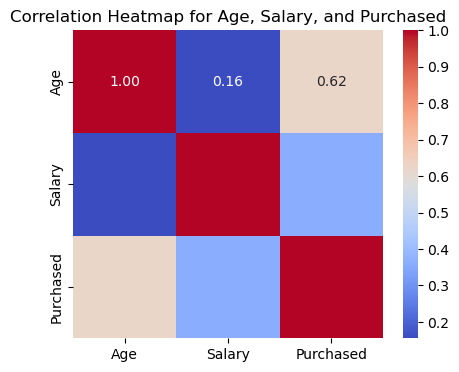

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your Ads data from the CSV file
path_data = "C:/Users/Conno/Dropbox/SocialAds/social_ads.csv"

ADS_raw_data = pd.read_csv(path_data)

# Select columns of interest for correlation analysis
columns_of_interest = ['Age', 'Salary', 'Purchased']

# Convert 'purchased' column to numeric (assuming it's already 0/1)
ADS_raw_data['Purchased'] = pd.to_numeric(ADS_raw_data['Purchased'], errors='coerce')

# Calculate correlation coefficients
cm = np.corrcoef(ADS_raw_data[columns_of_interest].values.T)

# Create heatmap using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=columns_of_interest, yticklabels=columns_of_interest)
plt.title("Correlation Heatmap for Age, Salary, and Purchased")
plt.show()



In [234]:
## Convert Pandas to Numpy

ADS_raw_data_np = ADS_raw_data.to_numpy()

In [235]:
ADS_raw_data_np


array([[   19, 19000,     0],
       [   35, 20000,     0],
       [   26, 43000,     0],
       ...,
       [   50, 20000,     1],
       [   36, 33000,     0],
       [   49, 36000,     1]], dtype=int64)

In [236]:
ADS_raw_data_np.shape


(400, 3)

In [237]:
X = ADS_raw_data_np[:, :-1]


y = ADS_raw_data_np[:, 1:2]

In [238]:
y


array([[ 19000],
       [ 20000],
       [ 43000],
       [ 57000],
       [ 76000],
       [ 58000],
       [ 84000],
       [150000],
       [ 33000],
       [ 65000],
       [ 80000],
       [ 52000],
       [ 86000],
       [ 18000],
       [ 82000],
       [ 80000],
       [ 25000],
       [ 26000],
       [ 28000],
       [ 29000],
       [ 22000],
       [ 49000],
       [ 41000],
       [ 22000],
       [ 23000],
       [ 20000],
       [ 28000],
       [ 30000],
       [ 43000],
       [ 18000],
       [ 74000],
       [137000],
       [ 16000],
       [ 44000],
       [ 90000],
       [ 27000],
       [ 28000],
       [ 49000],
       [ 72000],
       [ 31000],
       [ 17000],
       [ 51000],
       [108000],
       [ 15000],
       [ 84000],
       [ 20000],
       [ 79000],
       [ 54000],
       [135000],
       [ 89000],
       [ 32000],
       [ 44000],
       [ 83000],
       [ 23000],
       [ 58000],
       [ 55000],
       [ 48000],
       [ 79000],
       [ 18000

In [239]:
print(X.shape)

print(y.shape)

(400, 2)
(400, 1)


In [240]:
random_seed = int( random.random() * 100 )     ## 42


In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)


In [242]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320, 1)
(80, 1)


In [243]:
y_test.dtype 


dtype('int64')

In [244]:
## fix data type

X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )
y_train = y_train.astype(  np.float32  )
y_test  = y_test.astype(   np.float32  )

In [245]:
X_train_tr = torch.from_numpy(X_train)
X_test_tr  = torch.from_numpy(X_test)
y_train_tr = torch.from_numpy(y_train)
y_test_tr  = torch.from_numpy(y_test)

In [246]:
x_means      = X_train_tr.mean(0, keepdim=True ) 

x_deviations = X_train_tr.std( 0, keepdim=True) + epsilon

In [247]:
x_means


tensor([[3.7188e+01, 6.9381e+04]])

In [248]:
x_deviations


tensor([[1.0072e+01, 3.3407e+04]])

In [249]:
train_ds = TensorDataset( X_train_tr, y_train_tr  )


In [250]:
train_dl = DataLoader( train_ds, batch_size, shuffle=True  )


In [251]:
train_dl


In [252]:
## Linear Regression

class LinRegNet(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear(2, 1)
        
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means) / self.x_deviations
        
        y_pred = self.linear1(x)
        ## return torch.round( y_pred )
        return y_pred
        

In [253]:
## MLP

class MLP_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear(2, 1)
        self.act1    = nn.Sigmoid()
        self.linear2 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(0.25)
        
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means) / self.x_deviations
        
        x = self.linear1(x)
        x = self.act1(x)
        x = self.dropout(x)
        y_pred = self.linear2(x)
        
        ## return torch.round( y_pred )
        return y_pred

In [254]:
## Deep Learning with 2 hidden layers

class DL_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        self.linear1 = nn.Linear(2, 1)
        self.act1    = nn.ReLU()
        self.linear2 = nn.Linear(10, 6)
        self.act2    = nn.ReLU()
        self.linear3 = nn.Linear(6, 1)
        self.dropout = nn.Dropout(0.25)
        
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means) / self.x_deviations
        
        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        ## x = self.dropout(x)
        y_pred = self.linear3(x)
        
        ## return torch.round( y_pred )
        return y_pred

In [255]:
## Linear plus Nonlinear
## f1 + f2

class LinearPlusNonLinear_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()
        
        self.x_means      = x_means
        self.x_deviations = x_deviations
        
        ## F1
        self.f1_linear1 = nn.Linear(2, 1)
        
        ## F2
        self.f2_linear1 = nn.Linear(11, 14)
        self.f2_act1    = nn.Sigmoid()
        self.f2_linear2 = nn.Linear(14, 1)
        
    
    ## perform inference
    def forward(self, x):
        
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_linear2(f2)
        
        y_pred = f1 + f2
        
        ## return torch.round( y_pred )
        return y_pred

In [256]:
def training_loop( N_Epochs, model, loss_fn, opt  ):
    
    for epoch in range(N_Epochs):
        for xb, yb in train_dl:
            
            y_pred = model(xb)
            loss   = loss_fn(y_pred, yb)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
            
        if epoch % 20 == 0:
            print(epoch, "loss=", loss)
            

In [257]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DL_Net(nn.Module):
    def __init__(self, x_means, x_deviations):
        super(DL_Net, self).__init__()
        self.x_means = x_means
        self.x_deviations = x_deviations
        self.linear1 = nn.Linear(len(x_means), 64)
        self.linear2 = nn.Linear(64, 1)
        self.act1 = nn.ReLU()

    def forward(self, x):
        # Ensure x_means and x_deviations are tensors
        x_means_tensor = torch.tensor(self.x_means, dtype=torch.float32)
        x_deviations_tensor = torch.tensor(self.x_deviations, dtype=torch.float32)
        
        # Normalize input x
        x_normalized = (x - x_means_tensor) / x_deviations_tensor
        
        # Apply linear -> activation -> linear
        x = self.linear1(x_normalized)
        x = self.act1(x)
        x = self.linear2(x)
        return torch.sigmoid(x)  # Apply sigmoid for binary classification


In [258]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DL_Net(nn.Module):
    def __init__(self, x_means, x_deviations):
        super(DL_Net, self).__init__()
        self.x_means = x_means
        self.x_deviations = x_deviations
        self.linear1 = nn.Linear(len(x_means), 64)
        self.linear2 = nn.Linear(64, 1)
        self.act1 = nn.ReLU()

    def forward(self, x):
        # Ensure x_means and x_deviations are tensors
        x_means_tensor = torch.tensor(self.x_means, dtype=torch.float32)
        x_deviations_tensor = torch.tensor(self.x_deviations, dtype=torch.float32)

        print("x shape:", x.shape)
        print("x_means shape:", x_means_tensor.shape)
        print("x_deviations shape:", x_deviations_tensor.shape)
        
        # Normalize input x
        x_normalized = (x - x_means_tensor) / x_deviations_tensor
        
        print("x_normalized shape:", x_normalized.shape)
        
        # Apply linear -> activation -> linear
        x = self.linear1(x_normalized)
        x = self.act1(x)
        x = self.linear2(x)
        return torch.sigmoid(x)  # Apply sigmoid for binary classification


In [259]:
class DL_Net(nn.Module):
    def __init__(self, x_means, x_deviations):
        super(DL_Net, self).__init__()
        self.x_means = nn.Parameter(x_means)  # Assuming x_means is a tensor
        self.x_deviations = nn.Parameter(x_deviations)  # Assuming x_deviations is a tensor
        self.linear1 = nn.Linear(in_features, hidden_size)
        self.act1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, out_features)
    
    def forward(self, x):
        print("Shape of x:", x.shape)
        print("Shape of self.x_means:", self.x_means.shape)
        print("Shape of self.x_deviations:", self.x_deviations.shape)
        
        # Check if shapes match for element-wise operations
        assert x.shape == self.x_means.shape == self.x_deviations.shape, "Shape mismatch"
        
        # Perform normalization and forward pass
        x_normalized = (x - self.x_means) / self.x_deviations
        x = self.act1(self.linear1(x_normalized))
        x = self.linear2(x)
        
        return x



In [260]:
## y_pred_test


In [261]:
import torch.nn as nn
import torch.nn.functional as F

class DL_Net(nn.Module):
    def __init__(self, x_means, x_deviations):
        super(DL_Net, self).__init__()
        self.x_means = nn.Parameter(torch.tensor(x_means), requires_grad=False)
        self.x_deviations = nn.Parameter(torch.tensor(x_deviations), requires_grad=False)
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.act1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Normalize input using x_means and x_deviations
        x = (x - self.x_means) / self.x_deviations
        x = self.act1(self.linear1(x))
        x = self.linear2(x)
        return x



In [262]:
class DL_Net(nn.Module):
    def __init__(self, x_means, x_deviations):
        super(DL_Net, self).__init__()
        self.x_means = nn.Parameter(torch.tensor(x_means))
        self.x_deviations = nn.Parameter(torch.tensor(x_deviations))
        # Define your model layers here

    def forward(self, x):
        # Normalize input tensor 'x' using x_means and x_deviations
        normalized_x = (x - self.x_means) / self.x_deviations
        # Pass through model layers
        # Example: normalized_x = self.conv1(normalized_x)
        #          normalized_x = self.relu(normalized_x)
        return normalized_x



In [263]:
y_test_tr.shape


torch.Size([80, 1])

In [264]:
len(X_test_tr)


80

In [265]:
class DL_Net(nn.Module):
    def __init__(self, x_means, x_deviations):
        super(DL_Net, self).__init__()
        self.x_means = torch.tensor(x_means)  # Assuming x_means is a numpy array or list
        self.x_deviations = torch.tensor(x_deviations)  # Assuming x_deviations is a numpy array or list
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.act1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        print("Input shape:", x.shape)
        print("Means shape:", self.x_means.shape)
        print("Deviations shape:", self.x_deviations.shape)
        
        x = (x - self.x_means) / self.x_deviations  # Check shapes and types here
        print("Transformed input shape:", x.shape)
        
        x = self.act1(self.linear1(x))
        x = self.linear2(x)
        return x



In [266]:
class DL_Net(nn.Module):
    def __init__(self, x_means, x_deviations):
        super(DL_Net, self).__init__()
        self.x_means = torch.tensor(x_means)
        self.x_deviations = torch.tensor(x_deviations)
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.act1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        print("Input shape:", x.shape)
        print("Means shape:", self.x_means.shape)
        print("Deviations shape:", self.x_deviations.shape)

        x = (x - self.x_means) / self.x_deviations  # Check shapes and types here
        print("Transformed input shape:", x.shape)

        x = self.act1(self.linear1(x))
        x = self.linear2(x)
        return x


In [267]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data from CSV file
data = pd.read_csv('C:/Users/Conno/Dropbox/SocialAds/social_ads.csv')

# Assuming 'Purchased' is the target column
target_column_name = 'Purchased'

# Separate features (X) and target variable (y)
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and instantiate a regressor (e.g., linear regression)
regressor = LinearRegression()

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model (e.g., using RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.31511440479058833


In [268]:
y_pred.shape


(80,)

In [269]:
y_pred


array([ 0.36269954,  0.97356109, -0.00371156,  0.72662375, -0.04583675,
        0.12344117,  0.74760863,  0.18670667,  0.43364401,  0.442411  ,
        0.26374437,  0.59210291, -0.11441833, -0.2966913 ,  0.22914272,
        0.44555105,  0.58349136,  0.58255877,  0.26859416,  0.77860394,
       -0.22873144,  0.17402248,  0.39245141,  0.92282435, -0.33912735,
        0.49454662,  0.50583193,  0.26405523,  1.02790418, -0.33067122,
        0.44303272, -0.12349618,  0.62328509,  0.14427062,  0.568942  ,
        0.30602499,  0.27251136,  0.34031578, -0.11395204, -0.15747611,
        0.46025583, -0.05929809, -0.2251251 ,  0.37976722, -0.18676168,
        0.80633521,  0.0936893 ,  0.18701753,  0.49408033,  0.1452032 ,
        0.0676992 ,  0.7950499 ,  0.29803516,  0.07192727,  0.37821291,
       -0.08420017,  1.05827777,  0.25811743,  0.19970172,  0.20815784,
        0.35769433,  0.22991988,  0.80335059,  0.17809511,  0.05970937,
        0.36397442,  0.54811255,  0.90404693,  0.34047121,  0.41

In [270]:
r2_score(y_test, y_pred)


0.5635292830482341

In [271]:
initial_types = [(
          'float_input',
          FloatTensorType(  [None, 2 ]  )

)]

In [272]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import onnxmltools
from onnxmltools.convert.common.data_types import FloatTensorType

# Load data from CSV file
data = pd.read_csv('C:/Users/Conno/Dropbox/SocialAds/social_ads.csv')

# Assuming 'Purchased' is the target column
target_column_name = 'Purchased'

# Separate features (X) and target variable (y)
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Rename columns to match 'f%d' pattern for ONNX compatibility
X.columns = ['f{}'.format(i) for i in range(len(X.columns))]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model (e.g., using RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Specify the initial types for input data (X_test)
initial_type = [('float_input', FloatTensorType([None, X_test.shape[1]]))]





Root Mean Squared Error: 0.31511440479058833


Root Mean Squared Error (RMSE): 0.31511440479058833
R-squared (R2): 0.5635292830482341
Mean Absolute Error (MAE): 0.2655035494352019


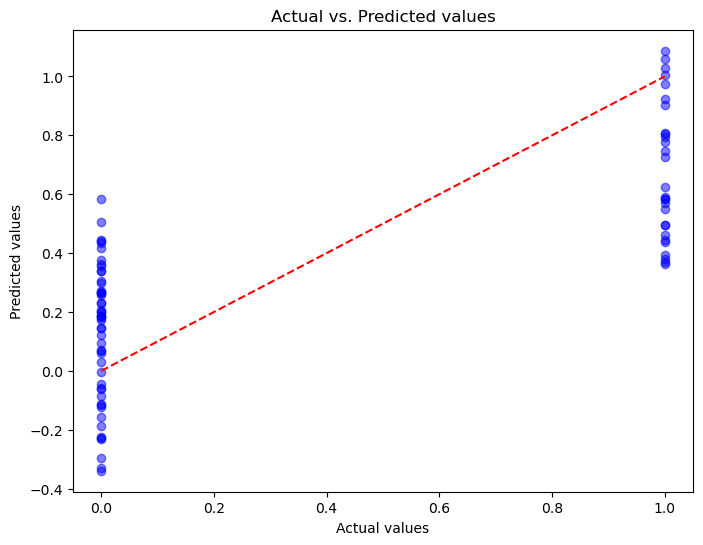

In [273]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('C:/Users/Conno/Dropbox/SocialAds/social_ads.csv')

# Assuming 'Purchased' is the target column
target_column_name = 'Purchased'

# Separate features (X) and target variable (y)
X = data.drop(columns=[target_column_name])
y = data[target_column_name]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs. Predicted values")
plt.show()
